![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population. Explore the `students` data using PostgreSQL to find out if this is true and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      | 
| ------------- | ------------------------------------------------ |
| inter_dom     | Types of students                                |
| japanese_cate | Japanese language proficiency                    | 
| english_cate  | English language proficiency                     |
| academic      | Current academic level                           | 
| age           | Current age of student                           |
| stay          | Current length of stay in years                  |
| todep         | Total score of depression (PHQ-9 test)           |
| tosc          | Total score of social connectedness (SCS test)   |
| toas          | Total score of Acculturative Stress (ASISS test) |

In [19]:
--Viewing all data
SELECT *
FROM students;

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,140,,,,,,,,,
282,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,131,,,,,,,,,
283,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,202,,,,,,,,,
284,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,207,,,,,,,,,


In [20]:
--viewing data with the average of all scores compared to length of stay
SELECT stay,
ROUND(AVG(todep + tosc + toas),2) AS round_avg
FROM students
GROUP BY stay
ORDER BY stay DESC;

,stay,round_avg
0,NaN,NaN
1,10.0,95.00
2,8.0,119.00
3,7.0,97.00
4,6.0,102.67
5,5.0,130.67
6,4.0,121.70
7,3.0,118.00
8,2.0,120.52
9,1.0,116.66


In [21]:
--viewing data with each individual score's average compared to length of stay
SELECT stay,
ROUND(AVG(todep),2) AS average_phq,
ROUND(AVG(tosc),2) AS average_scs,
ROUND(AVG(toas),2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay;

,stay,average_phq,average_scs,average_as
0,1,7.48,38.11,72.80
1,2,8.28,37.08,77.67
2,3,9.09,37.13,78.00
3,4,8.57,33.93,87.71
4,5,0.00,34.00,91.00
5,6,6.00,38.00,58.67
6,7,4.00,48.00,45.00
7,8,10.00,44.00,65.00
8,10,13.00,32.00,50.00


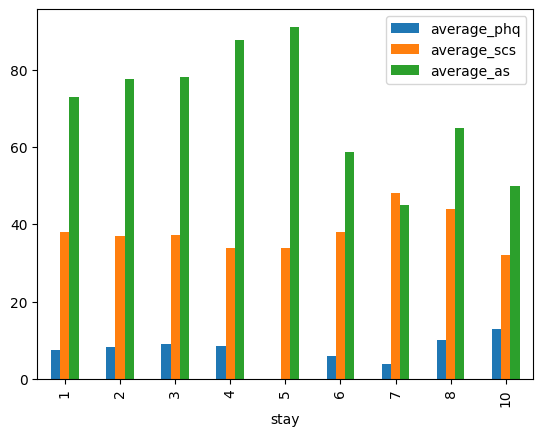

In [23]:
import matplotlib.pyplot as plt
df2.plot(x="stay", y=["average_phq", "average_scs", "average_as"], kind="bar")
plt.show()